In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/DATASET.zip

Archive:  /content/drive/MyDrive/DATASET.zip
   creating: DATASET/
  inflating: DATASET/FMD-1-D.jpg     
  inflating: DATASET/FMD-1-F.jpg     
  inflating: DATASET/FMD-1-M.jpg     
  inflating: DATASET/FMD-10-D.jpg    
  inflating: DATASET/FMD-10-F.jpg    
  inflating: DATASET/FMD-10-M.jpg    
  inflating: DATASET/FMD-100-D.jpg   
  inflating: DATASET/FMD-100-F.jpg   
  inflating: DATASET/FMD-100-M.jpg   
  inflating: DATASET/FMD-101-D.jpg   
  inflating: DATASET/FMD-101-F.jpg   
  inflating: DATASET/FMD-101-M.jpg   
  inflating: DATASET/FMD-102-D.jpg   
  inflating: DATASET/FMD-102-F.jpg   
  inflating: DATASET/FMD-102-M.jpg   
  inflating: DATASET/FMD-103-D.jpg   
  inflating: DATASET/FMD-103-F.jpg   
  inflating: DATASET/FMD-103-M.jpg   
  inflating: DATASET/FMD-104-D.jpg   
  inflating: DATASET/FMD-104-F.jpg   
  inflating: DATASET/FMD-104-M.jpg   
  inflating: DATASET/FMD-105-D.jpg   
  inflating: DATASET/FMD-105-F.jpg   
  inflating: DATASET/FMD-105-M.jpg   
  inflating: DATASET/

In [3]:
import os
%cd /content/DATASET/
uploaded = sorted(os.listdir('/content/DATASET/'))

/content/DATASET


In [4]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import torch
from torchvision import datasets
from torchvision import transforms
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

**DATASET**

In [61]:
fathers = []
mothers = []
daughters = []

for i in range(len(uploaded)-8):
  el = uploaded[i]
  if(uploaded[i][6] == 'F' or uploaded[i][7] == 'F' or uploaded[i][8] == 'F' or uploaded[i][9] == 'F' or uploaded[i][10] == 'F'):
    fathers.append(el)
  elif(uploaded[i][6] == 'M' or uploaded[i][7] == 'M' or uploaded[i][8] == 'M' or uploaded[i][9] == 'M' or uploaded[i][10] == 'M'):
    mothers.append(el)
  elif(uploaded[i][6] == 'D' or uploaded[i][7] == 'D' or uploaded[i][8] == 'D' or uploaded[i][9] == 'D' or uploaded[i][10] == 'D'):
    daughters.append(el)

EXAMPLES

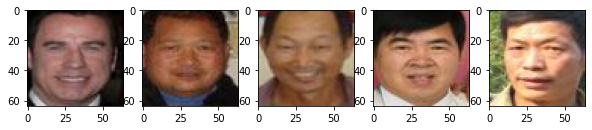

In [62]:
fig = plt.figure(figsize=(10, 7)) 
for i in range(5): 
  imf = Image.open(fathers[i])
  fig.add_subplot(1, 5, i+1)
  plt.imshow(imf)

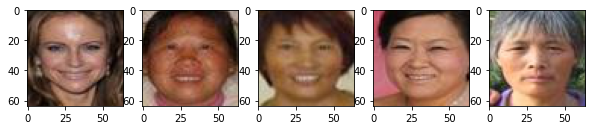

In [9]:
fig = plt.figure(figsize=(10, 7))
for i in range(5):
  imm = Image.open(mothers[i])
  fig.add_subplot(1, 5, i+1)
  plt.imshow(imm)

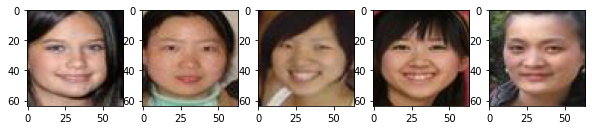

In [10]:
fig = plt.figure(figsize=(10, 7))
for i in range(5):
  imd = Image.open(daughters[i])
  fig.add_subplot(1, 5, i+1)
  plt.imshow(imd)

FROM JPG TO TENSORS

In [63]:
fa = []
for img in fathers: 
  i = Image.open(img)
  img_transform = transforms.ToTensor()
  i = img_transform(i)
  fa.append(i)

In [64]:
m = []
for img in mothers: 
  i = Image.open(img)
  img_transform = transforms.ToTensor()
  i = img_transform(i)
  m.append(i)

In [65]:
d = []
for img in daughters: 
  i = Image.open(img)
  img_transform = transforms.ToTensor()
  i = img_transform(i)
  d.append(i)

LOADING THE DATASET IN BATCHES

In [66]:
loaderf = torch.utils.data.DataLoader(dataset = fa, batch_size = 4, shuffle = True)
loaderm = torch.utils.data.DataLoader(dataset = m, batch_size = 4, shuffle = True)
loaderd = torch.utils.data.DataLoader(dataset = d, batch_size = 4, shuffle = True)

**AUTOENCODER**

In [67]:
class Autoencoder(torch.nn.Module): 
  def __init__(self): 
    super().__init__()
    self.conv1 = torch.nn.Conv2d(3, 16, 3, padding = 1)
    self.conv2 = torch.nn.Conv2d(16, 4, 3, padding = 1)
    self.pool = torch.nn.MaxPool2d(2, 2)

    self.t_conv1 = torch.nn.ConvTranspose2d(4, 16, 2 , stride = 2)
    self.t_conv2 = torch.nn.ConvTranspose2d(16, 3, 2, stride = 2)

  def forward(self, x): 
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = F.relu(self.t_conv1(x))
    x = F.sigmoid(self.t_conv2(x))
    return x

  def latent(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    return x
  
  def decode(self, x): 
    x = F.relu(self.t_conv1(x))
    x = F.sigmoid(self.t_conv2(x))
    return x

DEFINITION, LOSS FUNCTION AND OPTIMIZER

In [68]:
modelf = Autoencoder()
modelm = Autoencoder()
modeld = Autoencoder()
loss_function = torch.nn.MSELoss()
 
optimizerf = torch.optim.Adam(modelf.parameters(),
                             lr = 1e-3, 
                             weight_decay=1e-8)
optimizerm = torch.optim.Adam(modelm.parameters(),
                             lr = 1e-3, 
                             weight_decay=1e-8)
optimizerd = torch.optim.Adam(modeld.parameters(),
                             lr = 1e-3, 
                             weight_decay=1e-8)

TRAINING FOR FATHERS

In [69]:
epochs = 150
for epoch in range(epochs):
  reconstructf = []
  imagesf = []
  for image in loaderf:
      reconstructed = modelf(image)
      loss = loss_function(reconstructed, image)
      optimizerf.zero_grad()
      loss.backward()
      optimizerf.step()
      imagesf.append(image)
      reconstructf.append(reconstructed)

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [70]:
rf=[]
of=[]
for i in range(len(reconstructf)):
 transform=transforms.ToPILImage()
 a=reconstructf[i]
 b=imagesf[i]
 for i in range(len(a)):
  rf.append(transform(a[i]))
  of.append(transform(b[i]))

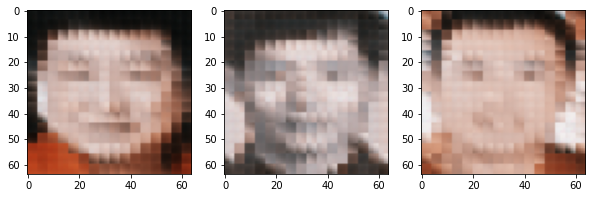

In [71]:
fig = plt.figure(figsize=(10, 7))
for i in range(3):
  imrf = rf[i]
  fig.add_subplot(1, 3, i+1)
  plt.imshow(imrf)

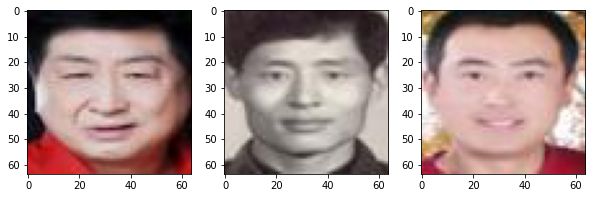

In [72]:
fig = plt.figure(figsize=(10, 7))
for i in range(3):
  imof = of[i]
  fig.add_subplot(1, 3, i+1)
  plt.imshow(imof)

TRAINING FOR MOTHERS

In [73]:
epochs = 150
for epoch in range(epochs):
  reconstructm = []
  imagesm = []
  for image in loaderm:
      reconstructed = modelm(image)
      loss = loss_function(reconstructed, image)
      optimizerm.zero_grad()
      loss.backward()
      optimizerm.step()
      imagesm.append(image)
      reconstructm.append(reconstructed)

In [74]:
rm=[]
om=[]
for i in range(len(reconstructm)):
 transform=transforms.ToPILImage()
 a=reconstructm[i]
 b=imagesm[i]
 for i in range(len(a)):
  rm.append(transform(a[i]))
  om.append(transform(b[i]))

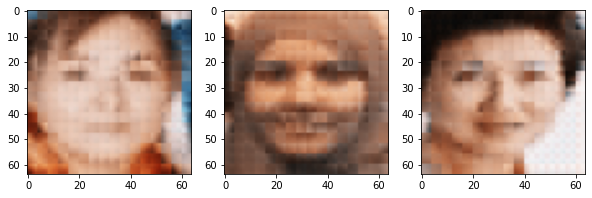

In [75]:
fig = plt.figure(figsize=(10, 7))
for i in range(3):
  imrm = rm[i]
  fig.add_subplot(1, 3, i+1)
  plt.imshow(imrm)

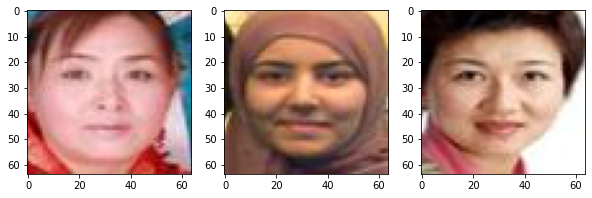

In [76]:
fig = plt.figure(figsize=(10, 7))
for i in range(3):
  imom = om[i]
  fig.add_subplot(1, 3, i+1)
  plt.imshow(imom)

TRAINING FOR DAUGHTERS

In [77]:
epochs = 150
for epoch in range(epochs):
  reconstructd = []
  imagesd = []
  for image in loaderd:
      reconstructed = modeld(image)
      loss = loss_function(reconstructed, image)
      optimizerd.zero_grad()
      loss.backward()
      optimizerd.step()
      imagesd.append(image)
      reconstructd.append(reconstructed)

In [78]:
rd=[]
od=[]
for i in range(len(reconstructd)):
 transform=transforms.ToPILImage()
 a=reconstructd[i]
 b=imagesd[i]
 for i in range(len(a)):
  rd.append(transform(a[i]))
  od.append(transform(b[i]))

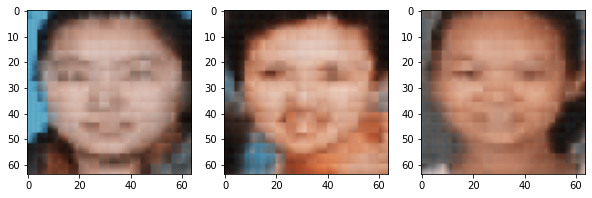

In [79]:
fig = plt.figure(figsize=(10, 7))
for i in range(3):
  imrd = rd[i]
  fig.add_subplot(1, 3, i+1)
  plt.imshow(imrd)

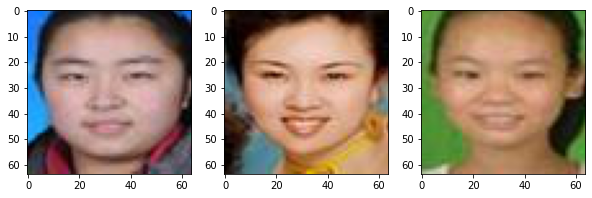

In [80]:
fig = plt.figure(figsize=(10, 7))
for i in range(3):
  imod = od[i]
  fig.add_subplot(1, 3, i+1)
  plt.imshow(imod)

LATENT SPACES

In [81]:
lf=[]
for image in loaderf: 
 latentf= modelf.latent(image)
 lf.append(latentf)

In [82]:
lm=[]
for image in loaderm:
 latentm= modelm.latent(image)
 lm.append(latentm)

In [83]:
ld=[]
for image in loaderd:
 latentd= modeld.latent(image)
 ld.append(latentd)

**REGRESSION MODEL**

INPUTS AND TARGETS

In [92]:
media = []
media_tot = []
for i in range(len(lf)):
  l = [lf[i], lm[i]]
  avg = torch.stack(l).mean(dim = 0)
  media.append(avg)
  for el in media[i]: 
    media_tot.append(el)

In [104]:
target=ld
target_tot = []
for i in range(len(target)): 
  for el in target[i]: 
    target_tot.append(el)

In [34]:
h=[]
j=[]
for i in media:
   i=i.unsqueeze(0)
   h.append(i)

for i in range(len(h)-3):
 T=torch.cat((h[i],h[i+1],h[i+2],h[i+3]))
 j.append(T)

T= torch.cat((h[498],h[499],h[500],h[501]))
j.append(T)
j=j[0:len(j):4]+[T]

a=j[125].size(0)
a 
    

4

In [35]:
p=[]
e=[]
for i in ld:
   i=i.unsqueeze(0)
   p.append(i)

for i in range(len(p)-3):
 P=torch.cat((p[i],p[i+1],p[i+2],p[i+3]))
 e.append(P)

P= torch.cat((p[498],p[499],p[500],p[501]))
e.append(P)
e=e[0:len(e):4]+[P]

a=e[125].size(0)
a 

4

SPLITTING THE DATASET

In [105]:
x_train, x_test, y_train, y_test = train_test_split(media, target, test_size = 0.33, random_state = 42)

RECOVERING PARENTS AND CORRESPONDING DAUGHTERS AFTER SPLIT

In [106]:
flattened_xtest=[]
for i in x_test:
  flattened_xtest.append(torch.flatten(i).tolist())
flattened_media=[]
for i in media:
  flattened_media.append(torch.flatten(i).tolist())
flattened_ytest=[]
for i in y_test:
  flattened_ytest.append(torch.flatten(i).tolist())
flattened_target=[]
for i in target:
  flattened_target.append(torch.flatten(i).tolist())

In [107]:
indici=[]
sorted_xtest=[]
nobatch_xtest=[]
for i in flattened_xtest:
  index=flattened_media.index(i)
  indici.append(index)
for i in indici:
  sorted_xtest.append(media[i])
for i in range(len(sorted_xtest)):
  for i in (sorted_xtest[i]):
   nobatch_xtest.append(i)

In [108]:
indicid=[]
sorted_ytest=[]
nobatch_ytest=[]
for i in flattened_ytest:
  index=flattened_target.index(i)
  indicid.append(index)
for i in indicid:
  sorted_ytest.append(target[i])
for i in range(len(sorted_ytest)):
  for i in (sorted_ytest[i]):
   nobatch_ytest.append(i)

In [109]:
flattened_mediatot=[]
flattened_nobatch_xtest=[]
indicifm=[]
imgf=[]
imgm=[]
for i in media_tot:
  flattened_mediatot.append(torch.flatten(i).tolist())
for i in nobatch_xtest:
  flattened_nobatch_xtest.append(torch.flatten(i).tolist())
for i in flattened_nobatch_xtest:
  indice=flattened_mediatot.index(i)
  indicifm.append(indice)
for i in indicifm:
  imgf.append(fa[i])
  imgm.append(m[i])

In [110]:
flattened_targettot=[]
flattened_nobatch_ytest=[]
indicidd=[]
imgd=[]
for i in target_tot:
  flattened_targettot.append(torch.flatten(i).tolist())
for i in nobatch_ytest:
  flattened_nobatch_ytest.append(torch.flatten(i).tolist())
for i in flattened_nobatch_ytest:
  indice=flattened_targettot.index(i)
  indicidd.append(indice)
for i in indicifm:
  imgd.append(d[i])
 

TRAINING THE REGRESSION MODEL

In [119]:
model1 = torch.nn.Sequential(
    torch.nn.BatchNorm2d(4, affine=False),
    torch.nn.Conv3d(4,120,3, padding=1),
    torch.nn.BatchNorm2d(4),
    torch.nn.ReLU(),
    

    torch.nn.Conv3d(120,250,3, padding=1),
    torch.nn.BatchNorm2d(4),
    torch.nn.ReLU(),
    
    
    torch.nn.Conv3d(250,120,3, padding=1),
    torch.nn.BatchNorm2d(4),
    torch.nn.ReLU(),
    

    torch.nn.Conv3d(120,4,3, padding=1),
    torch.nn.BatchNorm2d(4)
    
)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-1)
model1.train()
y_predi = []
losses = []
for i in range(len(x_train)):
  x1 = x_train[i]
  y1 = y_train[i]
  print(i)
  for i in range(50):
    y_pred = model1(x1)
    loss = criterion(y_pred, y1)
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    optimizer.step()
  print(loss)
  y_predi.append(y_pred)

0
tensor(0.7986, grad_fn=<MseLossBackward0>)
1
tensor(0.6167, grad_fn=<MseLossBackward0>)
2
tensor(0.5460, grad_fn=<MseLossBackward0>)
3
tensor(0.4624, grad_fn=<MseLossBackward0>)
4
tensor(0.3765, grad_fn=<MseLossBackward0>)
5
tensor(0.4015, grad_fn=<MseLossBackward0>)
6
tensor(0.2844, grad_fn=<MseLossBackward0>)
7
tensor(0.2136, grad_fn=<MseLossBackward0>)
8
tensor(0.2142, grad_fn=<MseLossBackward0>)
9
tensor(0.1597, grad_fn=<MseLossBackward0>)
10
tensor(0.1407, grad_fn=<MseLossBackward0>)
11
tensor(0.1538, grad_fn=<MseLossBackward0>)
12
tensor(0.1120, grad_fn=<MseLossBackward0>)
13
tensor(0.1491, grad_fn=<MseLossBackward0>)
14
tensor(0.1274, grad_fn=<MseLossBackward0>)
15
tensor(0.1408, grad_fn=<MseLossBackward0>)
16
tensor(0.0899, grad_fn=<MseLossBackward0>)
17
tensor(0.1078, grad_fn=<MseLossBackward0>)
18
tensor(0.1426, grad_fn=<MseLossBackward0>)
19
tensor(0.0830, grad_fn=<MseLossBackward0>)
20
tensor(0.1038, grad_fn=<MseLossBackward0>)
21
tensor(0.0740, grad_fn=<MseLossBackward0>

RESULTS OF THE TRAINING

In [120]:
b=[]
for i in range(len(y_predi)):
  for i in (y_predi[i]):
    b.append(i)


In [121]:
immagini = []
for i in range(len(b)): 
  transform=transforms.ToPILImage()
  immagine = modeld.decode(b[i])
  immagine = transform(immagine)
  immagini.append(immagine)

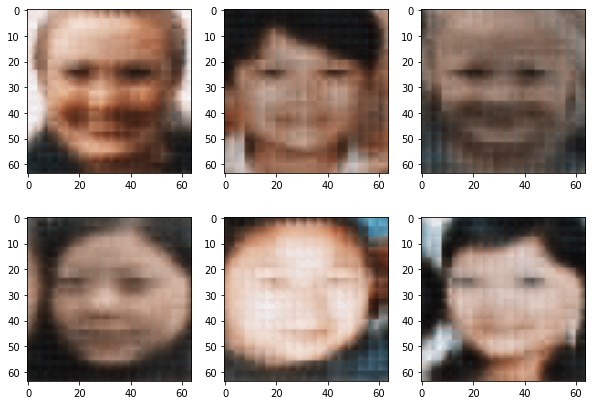

In [149]:
fig = plt.figure(figsize=(10, 7))
for i in range(6):
  immag = immagini[i+250]
  fig.add_subplot(2, 3, i+1)
  plt.imshow(immag)

PREDICTIONS

In [124]:
y_p = []
for el in x_test:
  y_prediction = model1(el)
  y_p.append(y_prediction)

In [125]:
b1=[]
for i in range(len(y_p)):
  for i in (y_p[i]):
    b1.append(i)


In [126]:
transform=transforms.ToPILImage()
immaginip = []
for i in range(len(b1)): 
  immagine = modeld.decode(b1[i])
  immagine = transform(immagine)
  immaginip.append(immagine)

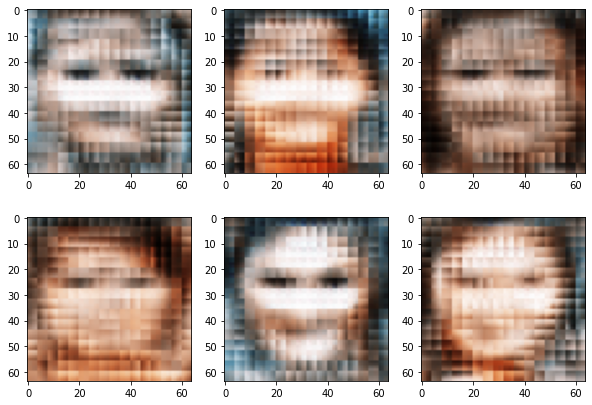

In [143]:
fig = plt.figure(figsize=(10, 7))
for i in range(6):
  immag = immaginip[i+20]
  fig.add_subplot(2, 3, i+1)
  plt.imshow(immag)

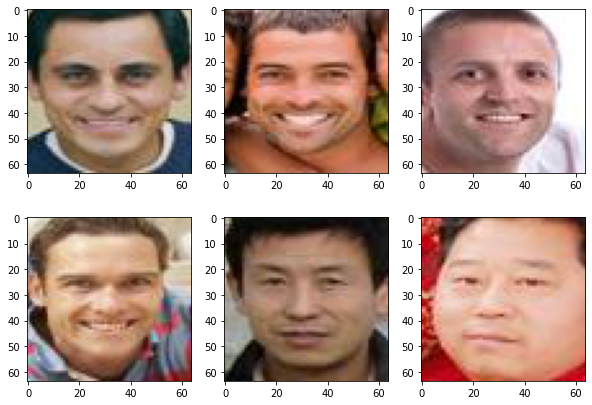

In [144]:
transform=transforms.ToPILImage()
fig = plt.figure(figsize=(10, 7))
for i in range(6):
  immag = imgf[i+20]
  immag=transform(immag)
  fig.add_subplot(2, 3, i+1)
  plt.imshow(immag)
  

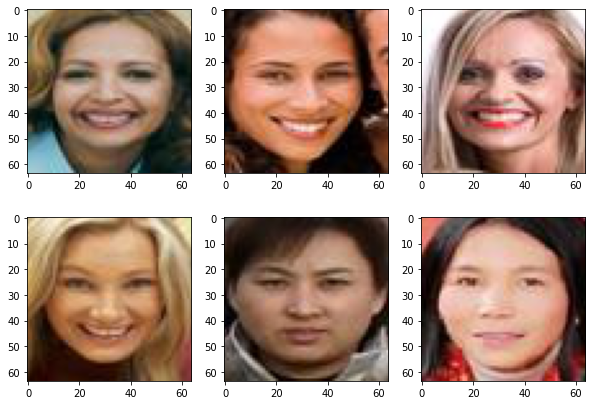

In [145]:
transform=transforms.ToPILImage()
fig = plt.figure(figsize=(10, 7))
for i in range(6):
  immag = imgm[i+20]
  immag=transform(immag)
  fig.add_subplot(2, 3, i+1)
  plt.imshow(immag)

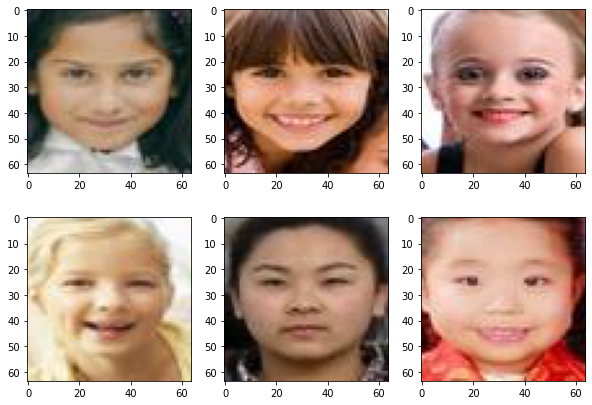

In [146]:
transform=transforms.ToPILImage()
fig = plt.figure(figsize=(10, 7))
for i in range(6):
  immag = imgd[i+20]
  immag=transform(immag)
  fig.add_subplot(2, 3, i+1)
  plt.imshow(immag)

In [134]:
b2=[]
for i in range(len(y_test)):
  for i in (y_test[i]):
    b2.append(i)

EVALUATION 

In [148]:
mse_media = 0
for i in range(len(y_test)):
  MSE = ((torch.pow((b1[i] - b2[i]), 2)).sum()) / (16*16*4)
  mse_media += float(MSE)
mse_avg = mse_media/(len(y_test)*10)
print(mse_avg)

0.25362608574685597
